# __First import libralies__

In [ ]:
!pip install pytubefix

In [ ]:
import subprocess
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import pytubefix
import torch
import torchvision
from IPython.display import Video
from pytubefix import YouTube
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid

We'll also print out library versions as well as the Python version. This makes our analysis reproducible for anyone who wants to review or reuse our work.

In [ ]:
print("torch version : ", torch.__version__)
print("pytube version : ", pytubefix.__version__)
print("torchvision version : ", torchvision.__version__)
print("cv2 version : ", cv2.__version__)

!python --version

torch version :  2.6.0+cu124
pytube version :  8.12.2
torchvision version :  0.21.0+cu124
cv2 version :  4.11.0
Python 3.11.11


### __Fetching YouTube Video Data.__

For this project, we'll use a video of an interview with an Indian Olympic boxer [Mary Kom](https://en.wikipedia.org/wiki/Mary_Kom). She's a legendary athlete with many achievements. Among others, she's the only boxer to ever win eight World Championship medals.

We'll load the video of her interview from YouTube. We want to put the video file in directory `"data"` which should be in the `"project4"` directory.

**Task 4.2.1:** Create a variable for the video directory using `pathlib` syntax.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path
project_dir = Path("/content/drive/My Drive/Celebrity Sightings in India")
video_dir = project_dir / "videos"

print(video_dir)

/content/drive/My Drive/Celebrity Sightings in India/videos


Next we'll need to specify the URL of the YouTube video and download the video. We decided to save the video under file name `video_name = "mary_kom.mp4"`.

In [ ]:
video_name = "mary_kom.mp4"
video_url = "https://www.youtube.com/watch?v=XScnCdyVbIU"
yt = YouTube(video_url)

In [ ]:
!pip install --upgrade pytube


**Task 4.2.2:** Fill in the missing code in the `else` part of the `try/except` block below. If grabbing the YouTube stream worked, we want to download the video to directory `video_dir` using file name `video_name`.

<div class="alert alert-info" role="alert">
    <p><b>Changes with respect to the video</b></p>
<p>The instructor in the video is downloading the video directly from YouTube. We've since made changes to include the video as part of the project and spare you the download time.</p>
    <p>We've left the activity as a placeholder but you can skip it altogether.</p>
</div>

In [ ]:
!ls -l project4/data/

ls: cannot access 'project4/data/': No such file or directory


**Task 4.2.3:** Create a variable for the video file path using `pathlib` syntax.

In [ ]:
# The following variables you've already defined will be helpful
print(video_dir)
print(video_name)

/content/drive/My Drive/Celebrity Sightings in India/videos
mary_kom.mp4


In [ ]:
video = video_dir / video_name

print(video)

/content/drive/My Drive/Celebrity Sightings in India/videos/mary_kom.mp4


Now let's take a peak of the video.

In [ ]:
from IPython.display import Video

input_video = "/content/drive/My Drive/Celebrity Sightings in India/mary_kom.mp4"
Video(input_video, embed=True, width=600)


**Task 4.2.4:** Fill in the missing code that defines the signature of the `cut_video` function. By looking at the function's doc string, you can see what the input parameters should be.

In [ ]:
def cut_video(input_file, output_file, start_time, duration):
    """
    Cuts a portion of the video.

    :parameter input_file: Path to the input video file.
    :parameter output_file: Path to the output video file.
    :parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
    :parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
    """
    command = [
        "ffmpeg",
        "-ss",
        str(start_time),
        "-i",
        input_file,
        "-t",
        str(duration),
        "-c",
        "copy",
        output_file,
    ]
    subprocess.run(command)


cut_video?

Before we use this function, we should first prepare the output video path where we want to save the shortened video (`output_file` parameter we need to pass to the function).

**Task 4.2.5:** Create a variable for the output video file path using `pathlib` syntax. Let's call the file `"output.mp4"`. It should be in the same directory as our input video file.

In [ ]:
output_video_name = "output.mp4"

output_video = video_dir / output_video_name

print(output_video)

/content/drive/My Drive/Celebrity Sightings in India/videos/output.mp4


**Task 4.2.6:** Call the `cut_video` function using the `input_video` and `output_video` variables you defined in the previous tasks.

In [ ]:
start_time = "00:00:00"  # Start at 00 seconds
duration = "00:01:00"  # Cut 1 minute

# Call cut_video function
cut_video(input_video, output_video, start_time, duration)

Well done! We should be able to display this shortened one minute video we created.

In [ ]:
# Display the video
from IPython.display import Video

output_video= "/content/drive/My Drive/Celebrity Sightings in India/videos/output.mp4"
Video(output_video, embed=True, width=600)

Output hidden; open in https://colab.research.google.com to view.

### Exploring and Preparing the Data

Let's learn a bit more about our video data. We're curious about things like the frame rate, total frame count, and frame shape. To get this information, we'll use the `opencv-python` library just like in the previous project (`cv2` which we imported at the top of the notebook).

The first step is to create a video capture using `cv2.VideoCapture` and pass in the path to our video.

**Task 4.2.7:** Create a video capture for the one minute video we're working with. The rest of the code computes the frame rate and total frame count.

In [ ]:
video_capture = cv2.VideoCapture(output_video)

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count}")

Frame rate: 25.0
Total number of frames: 1502


Now let's display the first frame. We can fetch the first frame of our video capture by calling the `read()` method on it.

**Task 4.2.8:** Use the video capture variable you defined in the previous task and fetch the first frame. The rest of the code will display the frame.

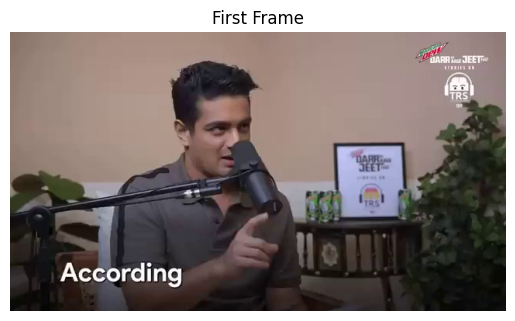

In [ ]:
ret, first_frame = video_capture.read()

if ret:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

**Task 4.2.9:** Get the shape of the frame and the number of channels by calling the `shape` attribute on the `first_frame` variable.

In [ ]:
height, width, channel = first_frame.shape

print("frames height : ", height)
print("frames width : ", width)
print("frames channel : ", channel)

frames height :  360
frames width :  640
frames channel :  3


The next thing we need to do is extract the individual frames from the video.

**Task 4.2.10:** Create a directory path for the extracted frames using the `pathlib` syntax. This path should be a directory called `extracted_frames` which should be in `video_dir`.

In [ ]:
frames_dir = video_dir / "extracted_frames"

frames_dir.mkdir(exist_ok=True)
print(frames_dir)

/content/drive/My Drive/Celebrity Sightings in India/videos/extracted_frames


**Task 4.2.11:** Fill in the missing code below that saves every fifth frame from the video.

In [ ]:
interval = frame_rate * 0.20  # Extract every fifth frame from the video
frame_count = 0

print("Start extracting individual frames...")
while True:
    # read next frame from the video_capture
    ret, frame = video_capture.read()
    if not ret:
        print("Finished!")
        break  # Break the loop if there are no more frames

    # Save frames at every 'interval' frames
    if frame_count % interval == 0:
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

Start extracting individual frames...
Finished!


**Task 4.2.12:** Compute the number of frames we've extracted by using `iterdir()` method on the `frames_dir` path. That'll give you a generator that you need to covert to `list` before using`len`.

In [ ]:
n_extraced_frames = len(list(frames_dir.iterdir()))

print(f"We saved {n_extraced_frames} frames.")

We saved 301 frames.


To conclude, let's display some sample frames that we extracted. The function `display_sample_images` below that'll display a grid of sample frames is the same as the one we used in the previous project.

**Task 4.2.13:** Fill in the missing code in `display_sample_images` function.

In [ ]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))

            # Define resizing transformation that resizes to 240 x 240
            resize_transform = transforms.Resize((240, 240))
            # Resize image by using `resize_transform`
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images?

**Task 4.2.14:** Use `display_sample_images` function to display 20 of the frames that we extracted.

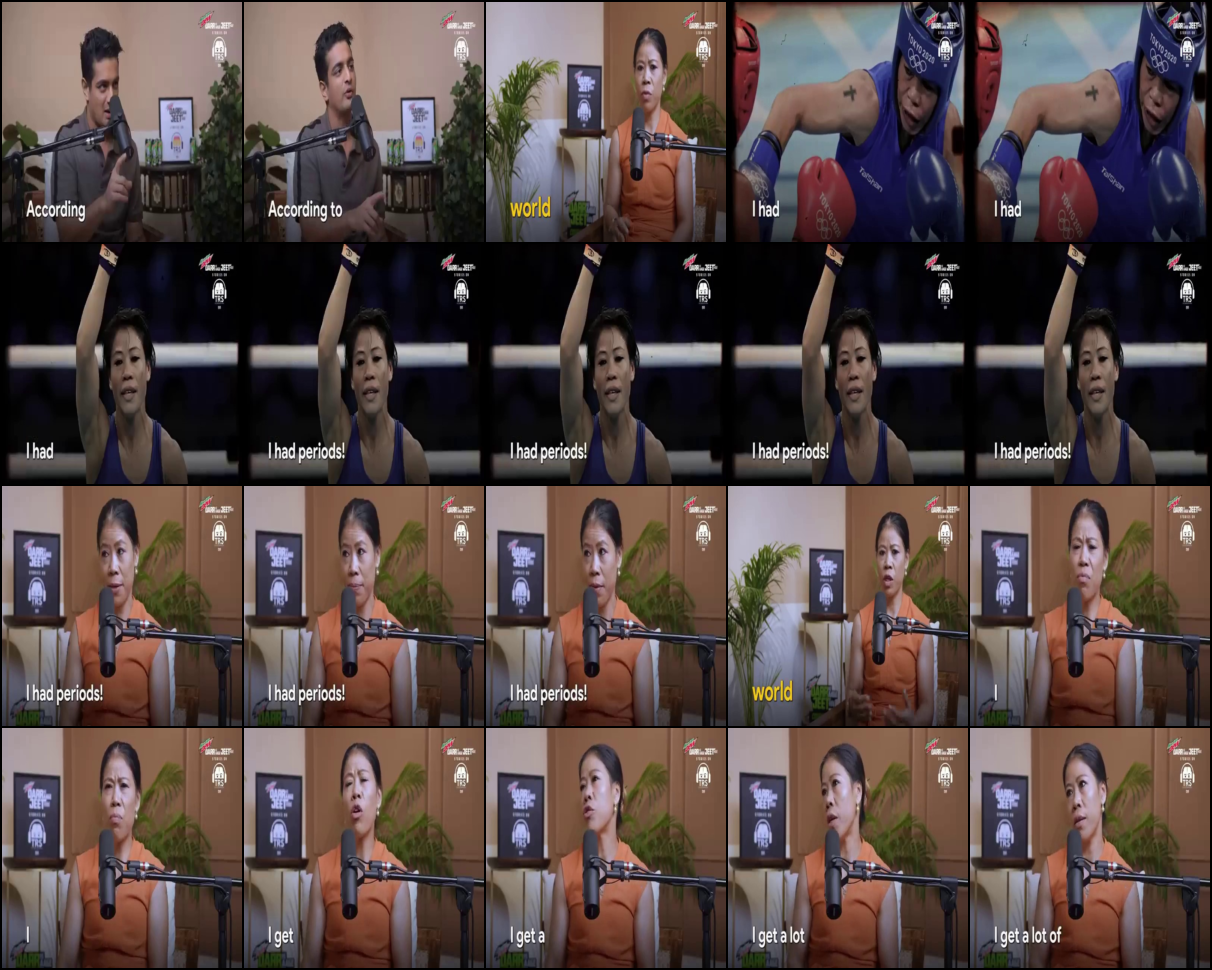

In [ ]:
# Call function `display_sample_images` on `frames_dir`
display_sample_images(frames_dir, sample=20)